<a href="https://colab.research.google.com/github/Riya222-Herald/Artificial-Intelligence-and-Machine-Learning/blob/master/2329555_Riya_Pradhan_Code_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/AI ML Workshops and tutorials/ai final tasks/Assignment 2/5. Movie Review Dataset/train_movie_review.csv')
val_df = pd.read_csv('/content/drive/MyDrive/AI ML Workshops and tutorials/ai final tasks/Assignment 2/5. Movie Review Dataset/val_movie_review.csv')
test_df = pd.read_csv('/content/drive/MyDrive/AI ML Workshops and tutorials/ai final tasks/Assignment 2/5. Movie Review Dataset/test_movie_review.csv')

In [ ]:
print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)
print("Test shape:", test_df.shape)

print("\nMissing values:")
print("Train:", train_df.isnull().sum())
print("Validation:", val_df.isnull().sum())
print("Test:", test_df.isnull().sum())

Train shape: (35000, 3)
Validation shape: (5000, 3)
Test shape: (10000, 3)

Missing values:
Train: Unnamed: 0    0
review        0
sentiment     0
dtype: int64
Validation: Unnamed: 0    0
review        0
sentiment     0
dtype: int64
Test: Unnamed: 0    0
review        0
sentiment     0
dtype: int64


In [ ]:
print(train_df.columns)
print(val_df.columns)
print(test_df.columns)

Index(['Unnamed: 0', 'review', 'sentiment'], dtype='object')
Index(['Unnamed: 0', 'review', 'sentiment'], dtype='object')
Index(['Unnamed: 0', 'review', 'sentiment'], dtype='object')


In [ ]:
# Initialize NLP tools
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase
    text = text.lower()

    # Remove URLs, mentions, hashtags, numbers, and special chars
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Handle contractions
    contractions = {
        "don't": "do not", "can't": "cannot", "won't": "will not",
        "it's": "it is", "i'm": "i am", "you're": "you are",
        "they're": "they are", "we're": "we are", "that's": "that is"
    }
    for contraction, expansion in contractions.items():
        text = text.replace(contraction, expansion)

    # Remove stopwords and lemmatize
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)


train_df['cleaned_text'] = train_df['review'].apply(clean_text)
val_df['cleaned_text'] = val_df['review'].apply(clean_text)
test_df['cleaned_text'] = test_df['review'].apply(clean_text)


print("Original:", train_df['review'].iloc[0])
print("Cleaned:", train_df['cleaned_text'].iloc[0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original: Having avoided seeing the movie in the cinema, but buying the DVD for my wife for Xmas, I had to watch it. I did not expect much, which usually means I get more than I bargained for. But 'Mamma Mia' - utter, utter cr**. I like ABBA, I like the songs, I have the old LPs. But this film is just terrible. The stage show looks like a bit of a musical, but this races along with songs hurriedly following one another, no characterisation, the dance numbers (which were heavily choreographed according to the extras on the DVD) are just thrown away with only half the bodies ever on screen, the dance chorus of north Europeans appear on a small Greek island at will, while the set and set up of numbers would have disgraced Cliff Richard's musicals in the sixties!Meryl (see me I'm acting)Streep can't even make her usual mugging effective in an over-the-top musical! Her grand piece - 'The Winner Takes It All' - is Meryl at the Met! Note to director - it should have been shot in stillness wit

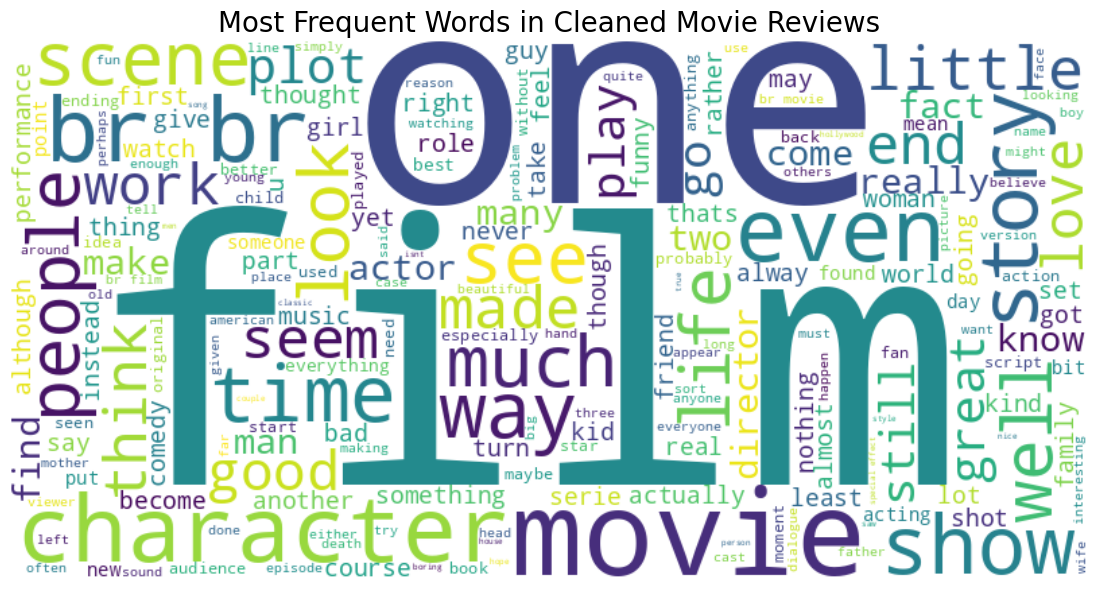

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


all_words = ' '.join(train_df['cleaned_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Cleaned Movie Reviews", fontsize=20)
plt.show()


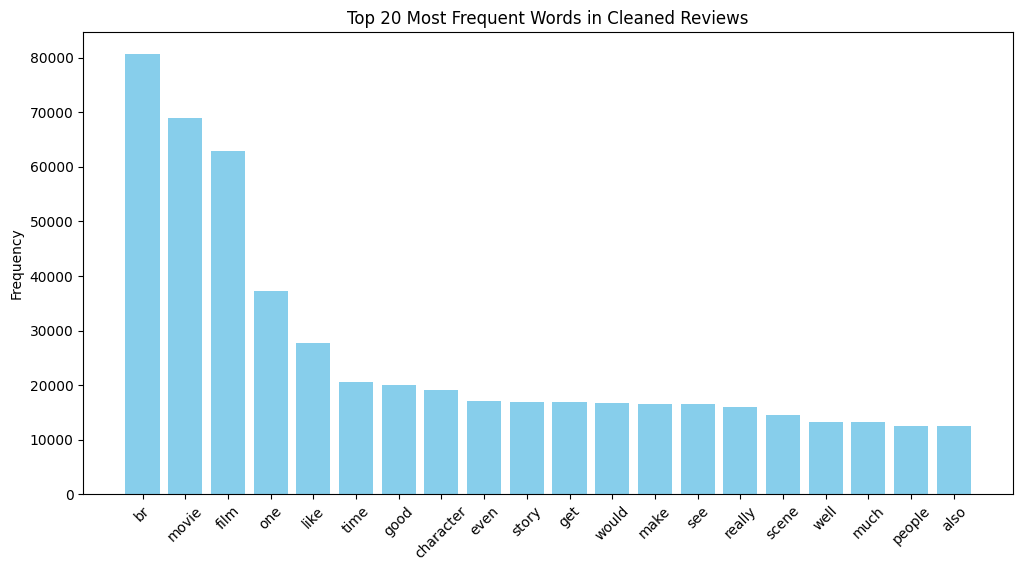

In [ ]:
from collections import Counter


words = all_words.split()

word_freq = Counter(words).most_common(20)

words, counts = zip(*word_freq)

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words in Cleaned Reviews")
plt.ylabel("Frequency")
plt.show()


In [ ]:
  from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['cleaned_text'])

X_train_seq = tokenizer.texts_to_sequences(train_df['cleaned_text'])
X_val_seq = tokenizer.texts_to_sequences(val_df['cleaned_text'])
X_test_seq = tokenizer.texts_to_sequences(test_df['cleaned_text'])
print("Training sample sequence:", X_train_seq[0])

Training sample sequence: [4069, 213, 3, 334, 2479, 173, 222, 1, 35, 401, 19, 498, 178, 12, 1, 1, 9297, 1783, 1783, 1, 6, 1, 6, 247, 83, 1, 4, 282, 738, 26, 44, 6, 118, 489, 1084, 240, 247, 1, 794, 5, 74, 6256, 662, 381, 2297, 5272, 1655, 921, 173, 1121, 151, 253, 433, 50, 192, 662, 4800, 2002, 1584, 821, 308, 2555, 775, 131, 131, 381, 13, 1, 3468, 4673, 489, 1, 15, 62, 1, 86, 10, 14, 548, 9298, 1027, 2188, 489, 1592, 238, 1958, 51, 4610, 1620, 655, 65, 136, 1, 267, 3270, 616, 3049, 1711, 3636, 4995, 1009, 292, 1, 1927, 202, 267, 447, 425, 618, 6, 23, 4216, 5, 42, 3570, 259, 126, 4217, 9, 10, 345, 7637, 238, 1, 324, 3553, 1, 4, 2059, 47, 3206, 173, 2537, 2653, 3271, 84, 1, 16, 3786, 2059, 505, 2432, 1, 160]


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq_lengths = [len(seq) for seq in X_train_seq]
max_len = int(np.percentile(train_seq_lengths, 95))

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

print(f"\nPadded sequences to length (95th percentile): {max_len}")
print("Padded training sample:", X_train_pad[0])


Padded sequences to length (95th percentile): 312
Padded training sample: [4069  213    3  334 2479  173  222    1   35  401   19  498  178   12
    1    1 9297 1783 1783    1    6    1    6  247   83    1    4  282
  738   26   44    6  118  489 1084  240  247    1  794    5   74 6256
  662  381 2297 5272 1655  921  173 1121  151  253  433   50  192  662
 4800 2002 1584  821  308 2555  775  131  131  381   13    1 3468 4673
  489    1   15   62    1   86   10   14  548 9298 1027 2188  489 1592
  238 1958   51 4610 1620  655   65  136    1  267 3270  616 3049 1711
 3636 4995 1009  292    1 1927  202  267  447  425  618    6   23 4216
    5   42 3570  259  126 4217    9   10  345 7637  238    1  324 3553
    1    4 2059   47 3206  173 2537 2653 3271   84    1   16 3786 2059
  505 2432    1  160    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  

In [ ]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
y_train = le.fit_transform(train_df['sentiment'])
y_val = le.transform(val_df['sentiment'])
y_test = le.transform(test_df['sentiment'])


print("\nLabel mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Label mapping: {0: 0, 1: 1}


In [ ]:

!pip install gensim python-Levenshtein wordcloud nltk tensorflow
!python -m gensim.downloader --download word2vec-google-news-300
!python -m nltk.downloader stopwords wordnet omw-1.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 115.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 102.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the f

In [ ]:

!pip install --upgrade numpy
!pip install --upgrade gensim python-Levenshtein wordcloud nltk tensorflow

!python -m gensim.downloader --download word2vec-google-news-300
!python -m nltk.downloader stopwords wordnet omw-1.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 59.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━

2025-05-18 05:34:50,081 : __main__ : INFO : Data has been installed and data path is /root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz
<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from tensorflow.keras.initializers import Constant
import numpy as np
import gensim.downloader as api

vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128

In [ ]:
model1 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),  # Removed input_length
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model1.build(input_shape=(None, max_len))
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 312, 128)       │    17,084,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,096,449 (65.22 MB)

 Trainable params: 17,096,449 (65.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.build(input_shape=(None, max_len))
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 312, 128)       │    17,084,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,133,505 (65.36 MB)

 Trainable params: 17,133,505 (65.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.initializers import Constant
import numpy as np
import gensim.downloader as api

try:
    word2vec = api.load('word2vec-google-news-300')

    embedding_matrix = np.zeros((vocab_size, 300))
    for word, i in tokenizer.word_index.items():
        if i < vocab_size and word in word2vec:
            embedding_matrix[i] = word2vec[word]

    model3 = Sequential([
        Embedding(
            input_dim=vocab_size,
            output_dim=300,
            input_length=max_len,
            embeddings_initializer=Constant(embedding_matrix)
        ),
        LSTM(64),
        Dense(1, activation='sigmoid')
    ])
    model3.layers[0].trainable = False

except Exception as e:
    print(f"Word2Vec failed: {e}\nUsing random embeddings instead.")
    model3 = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_len),
        LSTM(64),
        Dense(1, activation='sigmoid')
    ])
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.build(input_shape=(None, max_len))
model3.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 312, 300)       │    40,040,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        93,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,134,205 (153.10 MB)

 Trainable params: 93,505 (365.25 KB)

 Non-trainable params: 40,040,700 (152.74 MB)

MODEL TRAINING

In [ ]:
history1 = model1.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=10,
    batch_size=64,
    verbose=1
)

history2 = model2.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=10,
    batch_size=64,
    verbose=1
)

history3 = model3.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=10,
    batch_size=64,
    verbose=1
)

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.5009 - loss: 0.6978 - val_accuracy: 0.4886 - val_loss: 0.6964
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.5154 - loss: 0.6920 - val_accuracy: 0.5098 - val_loss: 0.6930
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.5220 - loss: 0.6900 - val_accuracy: 0.4944 - val_loss: 0.6943
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.5237 - loss: 0.6914 - val_accuracy: 0.4938 - val_loss: 0.6960
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.5113 - loss: 0.6903 - val_accuracy: 0.4960 - val_loss: 0.6954
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.5223 - loss: 0.6841 - val_accuracy: 0.4952 - val_loss: 0.6949
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.5296 - loss: 0.6767 - val_accuracy: 0.4932 - val_loss: 0.6971
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.5275 - loss: 0.6681 - 

In [ ]:
def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy: {accuracy:.4f}")
    return accuracy

print("\nTest Set Performance:")
test_acc1 = evaluate_model(model1, X_test_pad, y_test)
test_acc2 = evaluate_model(model2, X_test_pad, y_test)
test_acc3 = evaluate_model(model3, X_test_pad, y_test)


Test Set Performance:
Test Accuracy: 0.4991
Test Accuracy: 0.8662
Test Accuracy: 0.5094


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

def compile_model(model):
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

compile_model(model1)
compile_model(model2)
compile_model(model3)

In [ ]:
history1 = model1.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)
history2 = model2.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)
history3 = model3.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.5264 - loss: 0.6617 - val_accuracy: 0.4936 - val_loss: 0.7270
Epoch 2/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.5241 - loss: 0.6598 - val_accuracy: 0.4926 - val_loss: 0.7372
Epoch 3/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.5218 - loss: 0.6592 - val_accuracy: 0.4946 - val_loss: 0.7366
Epoch 4/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.5253 - loss: 0.6577 - val_accuracy: 0.4924 - val_loss: 0.7464
Epoch 1/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9873 - loss: 0.0548 - val_accuracy: 0.8534 - val_loss: 0.5234
Epoch 2/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9931 - loss: 0.0371 - val_accuracy: 0.8614 - val_loss: 0.5343
Epoch 3/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9921 - loss: 0.0377 - val_accuracy: 0.8604 - val_loss: 0.5488
Epoch 4/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9928 - loss: 0.0356 - 

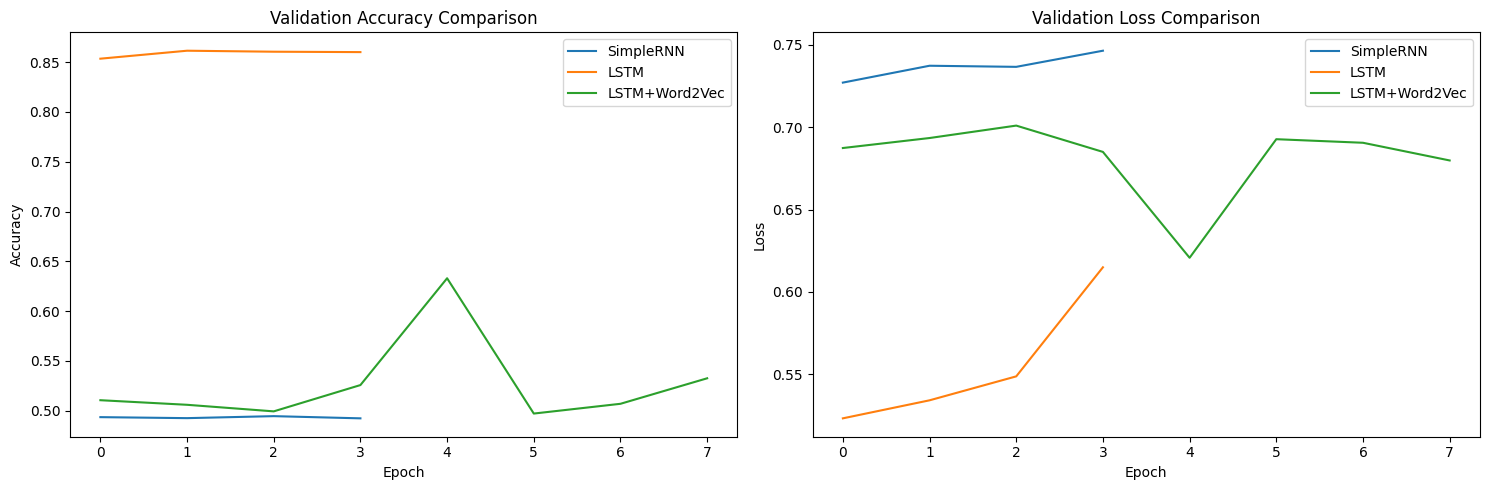

In [ ]:
import matplotlib.pyplot as plt

def plot_history(histories, model_names):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['val_accuracy'], label=name)
    plt.title('Validation Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()


    plt.subplot(1, 2, 2)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['val_loss'], label=name)
    plt.title('Validation Loss Comparison')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history([history1, history2, history3],
             ['SimpleRNN', 'LSTM', 'LSTM+Word2Vec'])

In [ ]:
import pandas as pd

metrics = []
for name, history in zip(['SimpleRNN', 'LSTM', 'Word2Vec'], [history1, history2, history3]):
    metrics.append({
        'Model': name,
        'Max Val Accuracy': f"{max(history.history['val_accuracy']):.4f}",
        'Final Val Accuracy': f"{history.history['val_accuracy'][-1]:.4f}",
        'Epochs to Converge': np.argmax(history.history['val_accuracy']) + 1
    })

pd.DataFrame(metrics).style.background_gradient(cmap='Blues')

,Model,Max Val Accuracy,Final Val Accuracy,Epochs to Converge
0,SimpleRNN,0.4946,0.4924,3
1,LSTM,0.8614,0.8600,2
2,Word2Vec,0.6330,0.5326,5



SimpleRNN Test Accuracy: 0.4983
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


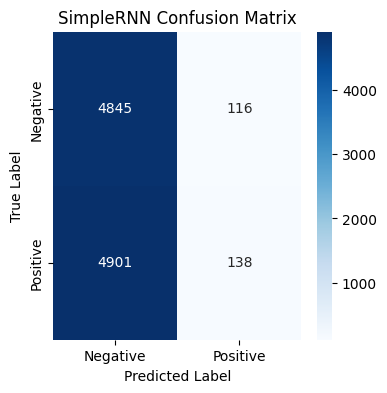


              precision    recall  f1-score   support

    Negative       0.50      0.98      0.66      4961
    Positive       0.54      0.03      0.05      5039

    accuracy                           0.50     10000
   macro avg       0.52      0.50      0.36     10000
weighted avg       0.52      0.50      0.35     10000


LSTM Test Accuracy: 0.8595
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


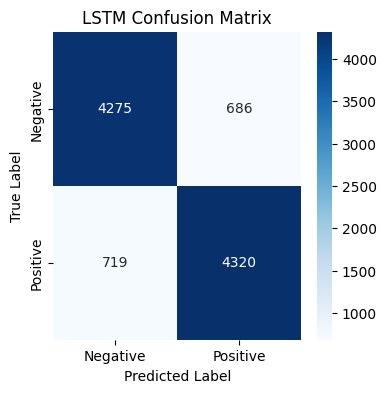


              precision    recall  f1-score   support

    Negative       0.86      0.86      0.86      4961
    Positive       0.86      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


LSTM+Word2Vec Test Accuracy: 0.6337
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


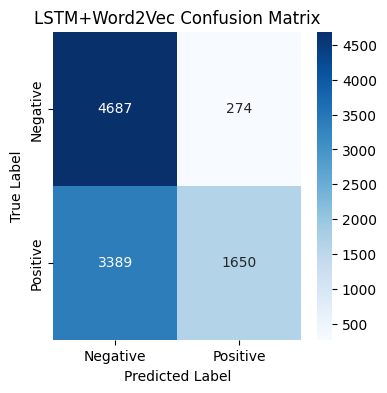


              precision    recall  f1-score   support

    Negative       0.58      0.94      0.72      4961
    Positive       0.86      0.33      0.47      5039

    accuracy                           0.63     10000
   macro avg       0.72      0.64      0.60     10000
weighted avg       0.72      0.63      0.60     10000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def evaluate_model(model, X_test, y_test, model_name):

    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"\n{model_name} Test Accuracy: {accuracy:.4f}")

    y_pred = (model.predict(X_test) > 0.5).astype(int)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


    print(f"\n{classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])}")
    return accuracy

acc1 = evaluate_model(model1, X_test_pad, y_test, "SimpleRNN")
acc2 = evaluate_model(model2, X_test_pad, y_test, "LSTM")
acc3 = evaluate_model(model3, X_test_pad, y_test, "LSTM+Word2Vec")

In [ ]:

import pandas as pd

results = pd.DataFrame({
    'Model': ['SimpleRNN', 'LSTM', 'LSTM+Word2Vec'],
    'Test Accuracy': [acc1, acc2, acc3],
    'Training Epochs': [
        len(history1.history['loss']),
        len(history2.history['loss']),
        len(history3.history['loss'])
    ],
    'Final Val Accuracy': [
        history1.history['val_accuracy'][-1],
        history2.history['val_accuracy'][-1],
        history3.history['val_accuracy'][-1]
    ]
})

print("\nModel Performance Comparison:")
print(results.sort_values('Test Accuracy', ascending=False))


Model Performance Comparison:
           Model  Test Accuracy  Training Epochs  Final Val Accuracy
1           LSTM         0.8595                4              0.8600
2  LSTM+Word2Vec         0.6337                8              0.5326
0      SimpleRNN         0.4983                4              0.4924


In [ ]:
!pip install gradio

import gradio as gr
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

best_model = model3

def predict_sentiment(text):
    """Preprocess input text and predict sentiment"""
    cleaned_text = clean_text(text)

    sequence = tokenizer.texts_to_sequences([cleaned_text])

    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')
    prediction = best_model.predict(padded_sequence)[0][0]
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    confidence = prediction if sentiment == "Positive" else 1 - prediction

    return f"{sentiment} ({(confidence*100):.1f}% confident)"
interface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=3, placeholder="Enter your movie review here..."),
    outputs="text",
    title="Movie Review Sentiment Analysis",
    description="Predicts whether a movie review is positive or negative using LSTM with Word2Vec embeddings.",
    examples=[
        ["This movie was fantastic! The acting was superb."],
        ["Terrible plot and bad acting. Would not recommend."]
    ]
)

interface.launch(debug=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 123.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.2 MB/s eta 0:00:00
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://8ae0bf876ddbcf8464.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://8ae0bf876ddbcf8464.gradio.live


In [ ]:
!pip install gradio

import gradio as gr
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

best_model = model3

def predict_sentiment(text):
    """Preprocess input text and predict sentiment"""
    cleaned_text = clean_text(text)
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')
    prediction = best_model.predict(padded_sequence)[0][0]

    sentiment = "Positive" if prediction > 0.5 else "Negative"
    confidence = prediction if sentiment == "Positive" else 1 - prediction

    return f"{sentiment} ({(confidence*100):.1f}% confident)"

interface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=3, placeholder="Enter your movie review here..."),
    outputs="text",
    title="Movie Review Sentiment Analysis",
    description="Predicts whether a movie review is positive or negative using LSTM with Word2Vec embeddings.",
    examples=[
        ["This movie was fantastic! The acting was superb."],
        ["Terrible plot and bad acting. Would not recommend."]
    ]
)

interface.launch(debug=True)

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://549d71b0b47a116b27.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://549d71b0b47a116b27.gradio.live


In [ ]:
!pip install gradio

import gradio as gr
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


best_model = model3

def predict_sentiment(text):
    """Preprocess input text and predict sentiment"""
    cleaned_text = clean_text(text)


    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')

    prediction = best_model.predict(padded_sequence)[0][0]

    sentiment = "Positive" if prediction > 0.5 else "Negative"
    confidence = prediction if sentiment == "Positive" else 1 - prediction

    return f"{sentiment} ({(confidence*100):.1f}% confident)"

interface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=3, placeholder="Enter your movie review here..."),
    outputs="text",
    title="Movie Review Sentiment Analysis",
    description="Predicts whether a movie review is positive or negative using LSTM with Word2Vec embeddings.",
    examples=[
        ["This movie was fantastic! The acting was superb."],
        ["Terrible plot and bad acting. Would not recommend."]
    ]
)


interface.launch(debug=True)

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://0cbd2d4bb809102881.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://0cbd2d4bb809102881.gradio.live


In [ ]:

model1.save("model_rnn.keras")
print("Model 1 saved as model_rnn.keras")
model2.save("model_lstm.keras")
print("Model 2 saved as model_rnn.keras")
model3.save("model_lstm_word2vec.keras")
print("Model 3 saved as model_rnn.keras")

Model 1 saved as model_rnn.keras
Model 2 saved as model_rnn.keras
Model 3 saved as model_rnn.keras
